In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

import warnings
warnings.filterwarnings("ignore")

In [12]:
x=0.5*math.pi
math.sin(x)+math.cos(x)

1.0

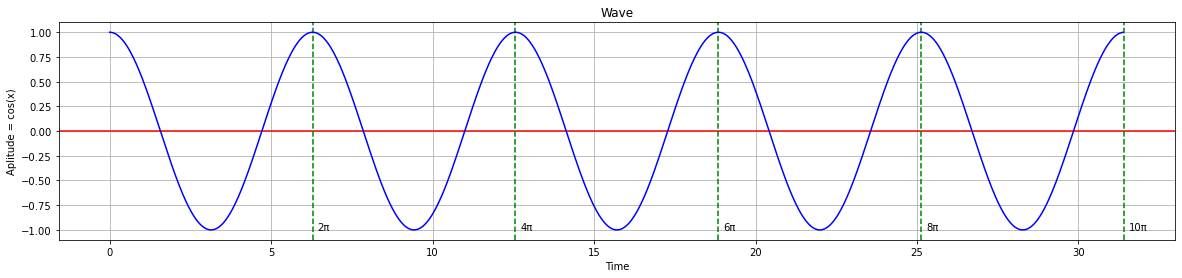

In [92]:
start=0
end=10*math.pi
inc=0.01*math.pi

time=np.arange(start,end,inc)
data=np.cos(time)

plt.figure(figsize=(20,4))
plt.title('Wave')
plt.xlabel('Time')
plt.ylabel('Aplitude = cos(x)')
plt.grid(True, which='both')
plt.axhline(y=0, color='red')
plt.axvline(x=2*math.pi, color='green', linestyle='--')
plt.annotate("2π", (2*math.pi+0.15, -1))
plt.axvline(x=4*math.pi, color='green', linestyle='--')
plt.annotate("4π", (4*math.pi+0.15, -1))
plt.axvline(x=6*math.pi, color='green', linestyle='--')
plt.annotate("6π", (6*math.pi+0.15, -1))
plt.axvline(x=8*math.pi, color='green', linestyle='--')
plt.annotate("8π", (8*math.pi+0.15, -1))
plt.axvline(x=10*math.pi, color='green', linestyle='--')
plt.annotate("10π", (10*math.pi+0.15, -1))
plt.plot(time, data, color='blue')

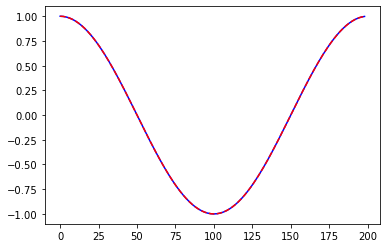

In [126]:
plt.plot(data[0:199], color='blue')
plt.plot(data[200:399], color='red', linestyle='--')

In [93]:
x = {'time': time, 'cos(t)': data}
df = pd.DataFrame(data=x)
print(f"This dataset has {len(df)} datasets")
df.head(10)

This dataset has 1000 datasets


,time,cos(t)
0,0.000000,1.000000
1,0.031416,0.999507
2,0.062832,0.998027
3,0.094248,0.995562
4,0.125664,0.992115
5,0.157080,0.987688
6,0.188496,0.982287
7,0.219911,0.975917
8,0.251327,0.968583
9,0.282743,0.960294


In [94]:
df[df['cos(t)'] == 1].index.values

array([  0, 200, 400, 600, 800])

In [103]:
used_dataset = df['cos(t)'] 
used_dataset

0      1.000000
1      0.999507
2      0.998027
3      0.995562
4      0.992115
         ...   
995    0.987688
996    0.992115
997    0.995562
998    0.998027
999    0.999507
Name: cos(t), Length: 1000, dtype: float64

<BarContainer object of 30 artists>

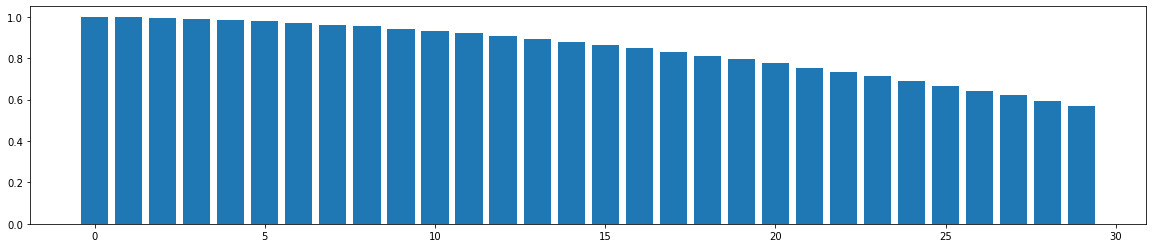

In [133]:
plt.figure(figsize=(20,4))
acf_vals = acf(used_dataset)
num_lags = 30
plt.bar(range(num_lags), acf_vals[:num_lags])

<Figure size 1440x720 with 0 Axes>

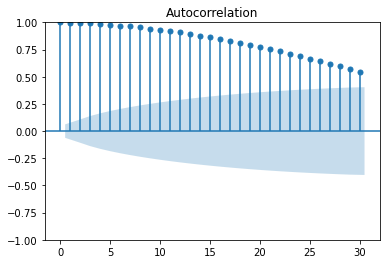

In [137]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(20,10))
plot_acf(used_dataset)
plt.show()

<BarContainer object of 15 artists>

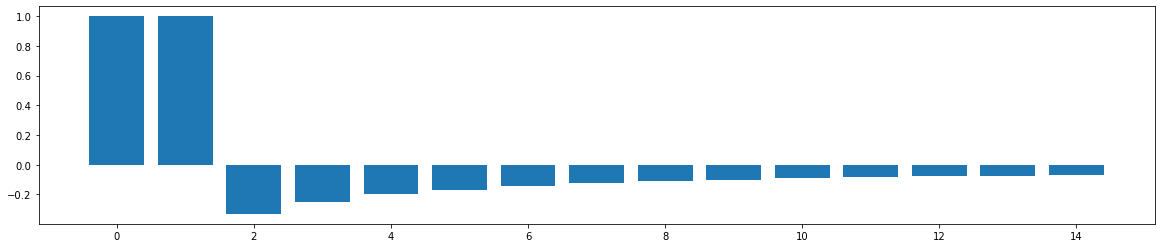

In [114]:
plt.figure(figsize=(20,4))
pacf_vals = pacf(used_dataset)
num_lags = 15
plt.bar(range(num_lags), pacf_vals[:num_lags])

<Figure size 1440x720 with 0 Axes>

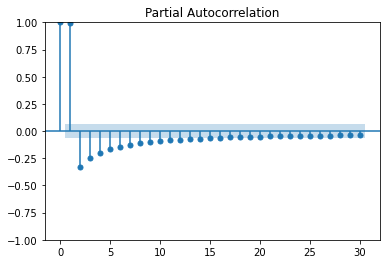

In [138]:
plt.figure(figsize=(20,10))
plot_pacf(used_dataset)
plt.show()

In [116]:
percent_test=80
percent_test=percent_test/100

time=df['time']
time_point=time[round(len(df)*percent_test)]
time_point

train, test = df.loc[df['time'] <= time_point], df.loc[df['time'] > time_point]

print(f"Number of Training Data: {train.shape[0]}")
print(f"Number of Testing Data: {test.shape[0]}")


Number of Training Data: 801
Number of Testing Data: 199


In [123]:
order = (0,1,0)
seasonal_order = (1, 0, 1, 12)

model = SARIMAX(train['cos(t)'], order=order, seasonal_order=seasonal_order)

model_fit = model.fit()
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.46412D+06    |proj g|=  1.35440D+11

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     18      1     0     0   1.835D+02  -1.846D+00
  F =  -1.8460958640160994     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                      SARIMAX Results                                       
Dep. Variable:                               cos(t)   No. Observations:                  801
Model:  

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
